# Affect of mean reward permutation

The Sticky Track and Stop algorithm always prefers to pull arms with smaller index. We firstly check the impact of permutation of arms.
+ In group 1, the arm with smaller index has a smaller mean reward
+ In group 2, the arm with smaller index has a bigger mean reward

Here we assume the reward vector is an arithmetic sequence.

In [1]:
# import package
from Source.agent import Sticky_TaS
from Source.env import Environment_Gaussian
from tqdm import tqdm
from time import time
import numpy as np

# define parameters
n_exp = 1
xi = 0.5

K_ = [10, 50, 250]
delta_ = [0.1, 0.05, 0.025]

In [2]:
# conduct experiments on the group 1
result_K_delta = dict() # the K and delta is the key
for K in K_:
    for delta in delta_:
        rlist = np.linspace(1.0, 0.0, K)
        
        stop_time_ = np.zeros(n_exp)
        correctness_ = np.ones(n_exp)
        
        for exp_id in tqdm(range(n_exp)):
            rlist_temp = rlist.copy()
            
            answer_set = list(np.where(rlist_temp > xi)[0] + 1)
            env = Environment_Gaussian(rlist=rlist_temp, K=K, random_seed=exp_id)
            agent = Sticky_TaS(K=K, delta=delta, xi=xi)
            
            output_arm = None
            while not agent.stop:
                arm = agent.action()
                reward = env.response(arm)
                output_arm = agent.observe(reward)
                if output_arm is not None:
                    break
            stop_time_[exp_id] = agent.t
            if output_arm not in answer_set:
                correctness_[exp_id] = 0
        
        mean_stop_time = np.mean(stop_time_)
        std_stop_time = np.std(stop_time_) / np.sqrt(n_exp)
        mean_success = np.mean(correctness_)
        result_K_delta[(K,delta)] = (mean_stop_time,std_stop_time,mean_success)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.13s/it]


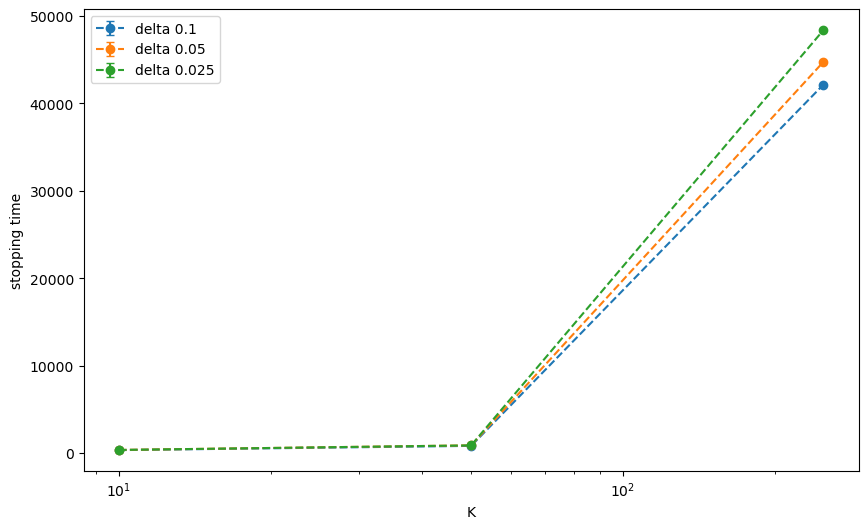

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for delta in delta_:
    stop_time_ = [result_K_delta[(K,delta)][0] for K in K_]
    # plt.plot(K_, stop_time_, label=f"delta {delta}")
    yerr_ = [result_K_delta[(K,delta)][1] for K in K_]
    plt.errorbar(K_, stop_time_, yerr=yerr_, capsize=3, fmt="--o", label=f"delta {delta}")
plt.xlabel("K")
plt.xscale('log')
plt.ylabel("stopping time")
plt.legend()
plt.show()

In [ ]:
# conduct experiments on the group 2
result_K_delta = dict() # the K and delta is the key
for K in K_:
    for delta in delta_:
        rlist = np.linspace(1.0, 0.0, K)
        
        stop_time_ = np.zeros(n_exp)
        correctness_ = np.ones(n_exp)
        
        for exp_id in tqdm(range(n_exp)):
            rlist_temp = rlist[::-1].copy()
            
            answer_set = list(np.where(rlist_temp > xi)[0] + 1)
            env = Environment_Gaussian(rlist=rlist_temp, K=K, random_seed=exp_id)
            agent = Sticky_TaS(K=K, delta=delta, xi=xi)
            
            output_arm = None
            while not agent.stop:
                arm = agent.action()
                reward = env.response(arm)
                output_arm = agent.observe(reward)
                if output_arm is not None:
                    break
            stop_time_[exp_id] = agent.t
            if output_arm not in answer_set:
                correctness_[exp_id] = 0
        
        mean_stop_time = np.mean(stop_time_)
        std_stop_time = np.std(stop_time_) / np.sqrt(n_exp)
        mean_success = np.mean(correctness_)
        result_K_delta[(K,delta)] = (mean_stop_time,std_stop_time,mean_success)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]